














# 结果展示

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import time
import os
import seaborn as sns

%matplotlib inline
from utils import config
from utils.backtest import backtest_stats, backtest_plot, get_baseline

c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


## 数据读取

In [35]:
root_path = os.getcwd()
root_path = os.path.join(root_path, "learn", "trade_file")
print("root_path: ", root_path)

root_path:  D:\work\毕业设计\毕业设计\工作代码\StockRL-main-luochuan\StockRL-main-2\learn\trade_file


In [36]:
path_dict = {}
for model in config.MODEL_LIST:
    path_dict[model] = os.path.join(root_path, "account_value_{}.csv".format(model))

In [37]:
a2c_account_value = pd.read_csv(path_dict["a2c"])
ddpg_account_value = pd.read_csv(path_dict["ddpg"])
ppo_account_value = pd.read_csv(path_dict["ppo"])
sac_account_value = pd.read_csv(path_dict["sac"])
td3_account_value = pd.read_csv(path_dict["td3"])
equal_weight=pd.read_csv(root_path+'\equal_weight.csv')
max_sharpe=pd.read_csv(root_path+'\max_sharpe.csv')
min_variance=pd.read_csv(root_path+'\min_variance.csv')

## 获取 baseline 的结果

In [38]:
baseline_df = get_baseline(config.SSE_50_INDEX,
              start="20200101",
              end="20220101")
baseline_stats = backtest_stats(baseline_df, value_col_name='close')

   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)
Annual return          0.031243
Cumulative returns     0.061128
Annual volatility      0.189636
Sharpe ratio           0.257722
Calmar ratio           0.131199
Stability              0.262218
Max drawdown          -0.238138
Omega ratio            1.046807
Sortino ratio          0.353088
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.989154
Daily value at risk   -0.023698
dtype: float64


In [46]:
baseline_df

date        tic       open       high        low      close  \
0    2020-01-02  000016.SH  3090.8331  3073.9313  3107.5172  3073.9313   
1    2020-01-03  000016.SH  3078.2793  3097.2518  3097.4088  3072.1137   
2    2020-01-06  000016.SH  3056.8359  3062.2801  3090.8402  3040.1945   
3    2020-01-07  000016.SH  3074.0152  3063.7464  3080.2714  3061.5608   
4    2020-01-08  000016.SH  3037.8525  3058.3585  3058.6969  3030.1048   
..          ...        ...        ...        ...        ...        ...   
481  2021-12-27  000016.SH  3278.4365  3286.1110  3291.9785  3264.0233   
482  2021-12-28  000016.SH  3303.4002  3282.5996  3307.7885  3280.2656   
483  2021-12-29  000016.SH  3240.8452  3308.2134  3308.2313  3240.8452   
484  2021-12-30  000016.SH  3261.7937  3240.2631  3276.9987  3236.1588   
485  2021-12-31  000016.SH  3274.3209  3269.6113  3282.6803  3261.8361   

         volume  day  processed_close  
0    50036392.0    3     1.000000e+06  
1    37185493.0    4     9.994087e+05  
2    47707827.0    0     9.890249e+05  
3    34371788.0    1     9.959757e+05  
4    37653773.0    2     9.857425e+05  
..          ...  ...              ...  
481  19675636.0    0     1.061840e+06  
482  26002262.0    1     1.067124e+06  
483  20098541.0    2     1.054300e+06  
484  22285032.0    3     1.052775e+06  
485  20549961.0    4     1.061128e+06  

[486 rows x 9 columns]

In [39]:
start_close_value = baseline_df.iloc[0]['close']
baseline_df['processed_close'] = ((baseline_df['close'] - start_close_value)/start_close_value + 1) * 1e+6

In [40]:
baseline_df.head()

date        tic       open       high        low      close  \
0  2020-01-02  000016.SH  3090.8331  3073.9313  3107.5172  3073.9313   
1  2020-01-03  000016.SH  3078.2793  3097.2518  3097.4088  3072.1137   
2  2020-01-06  000016.SH  3056.8359  3062.2801  3090.8402  3040.1945   
3  2020-01-07  000016.SH  3074.0152  3063.7464  3080.2714  3061.5608   
4  2020-01-08  000016.SH  3037.8525  3058.3585  3058.6969  3030.1048   

       volume  day  processed_close  
0  50036392.0    3   1000000.000000  
1  37185493.0    4    999408.705068  
2  47707827.0    0    989024.868578  
3  34371788.0    1    995975.674538  
4  37653773.0    2    985742.524565

## 展示最终的结果

In [41]:
result_account_value = pd.DataFrame(data = {
                                        'tradedate':baseline_df['date'],
                                        'a2c': a2c_account_value['total_assets'],
                                        'td3': td3_account_value['total_assets'],
                                        'ddpg':ddpg_account_value['total_assets'],
                                        'ppo':ppo_account_value['total_assets'],
                                        'sac':sac_account_value['total_assets'],
                                        'equal_weight':equal_weight['total_assets'],
                                        'mean_variance':max_sharpe['total_assets'],
                                        'min_variance':min_variance['total_assets'],
                                        'baseline': baseline_df['processed_close']})
result_account_value=result_account_value.set_index('tradedate')

In [42]:
result_account_value=result_account_value.iloc[:-1].apply(lambda x : (x - 1e+6)/1e+6)

In [43]:
result_account_value.head()

a2c       td3      ddpg       ppo       sac  equal_weight  \
tradedate                                                                    
2020-01-02  0.000000  0.000000  0.000000  0.000000  0.000000      0.000000   
2020-01-03 -0.000126 -0.000090 -0.000515 -0.000165  0.000127     -0.041520   
2020-01-06 -0.000210  0.000326 -0.002404 -0.000300 -0.000448     -0.043755   
2020-01-07 -0.000824 -0.000124 -0.002247 -0.000108  0.000324     -0.041887   
2020-01-08 -0.004448 -0.002574 -0.006736 -0.001717 -0.004335     -0.050992   

            mean_variance  min_variance  baseline  
tradedate                                          
2020-01-02       0.000000      0.000000  0.000000  
2020-01-03      -0.011054      0.009377 -0.000591  
2020-01-06      -0.012149      0.020711 -0.010975  
2020-01-07      -0.017554      0.019158 -0.004024  
2020-01-08      -0.020894      0.020129 -0.014257

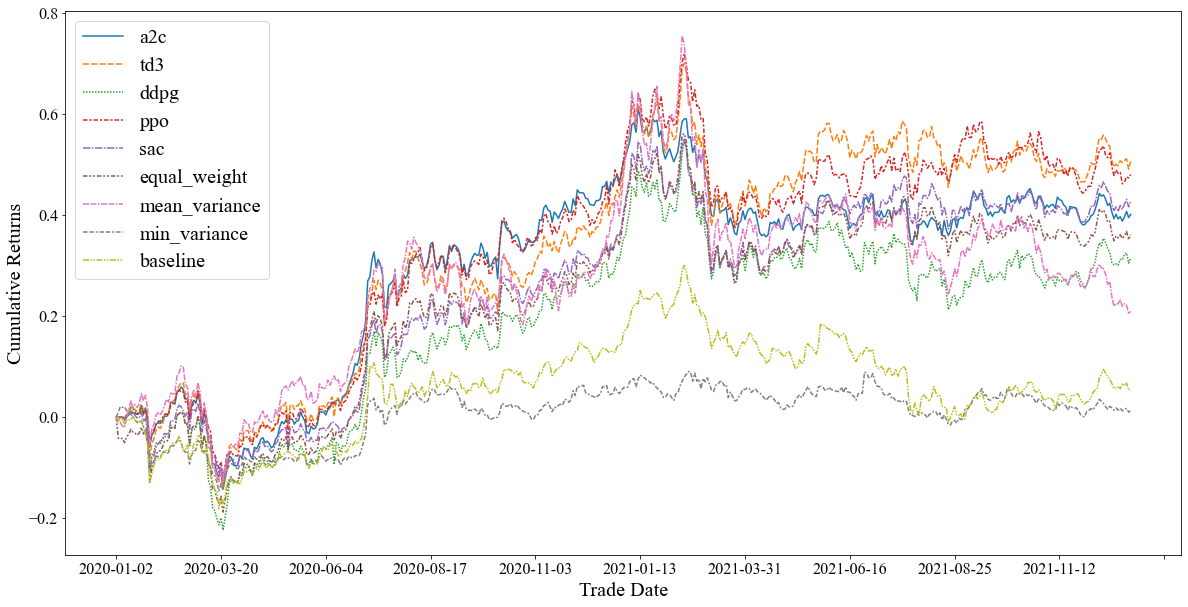

In [44]:
result_account_value.to_csv(os.path.join(root_path, "result_account_value.csv"), index=False)
#result_account_value.plot(figsize = (20, 10))
plt.figure(figsize=(20,10))  
from matplotlib import ticker
fig=sns.lineplot(data=result_account_value)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(50))
plt.xlabel('Trade Date', fontdict={'color': 'black',
                             'family': 'Times New Roman',
                             'weight': 'normal',
                             'size': 20})
plt.ylabel('Cumulative Returns', fontdict={'color': 'black',
                          'family': 'Times New Roman',
                          'weight': 'normal',
                          'size': 20})
plt.xticks(fontproperties='Times New Roman',size=16)
plt.yticks(fontproperties='Times New Roman',size=16)
plt.legend(prop={'family':'Times New Roman','size':20})
line_fig=fig.get_figure()
line_fig.savefig('./assets/all_backtest_no_cost.jpg',bbox_inches='tight')

## 展示 A2C 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)


c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\li

c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


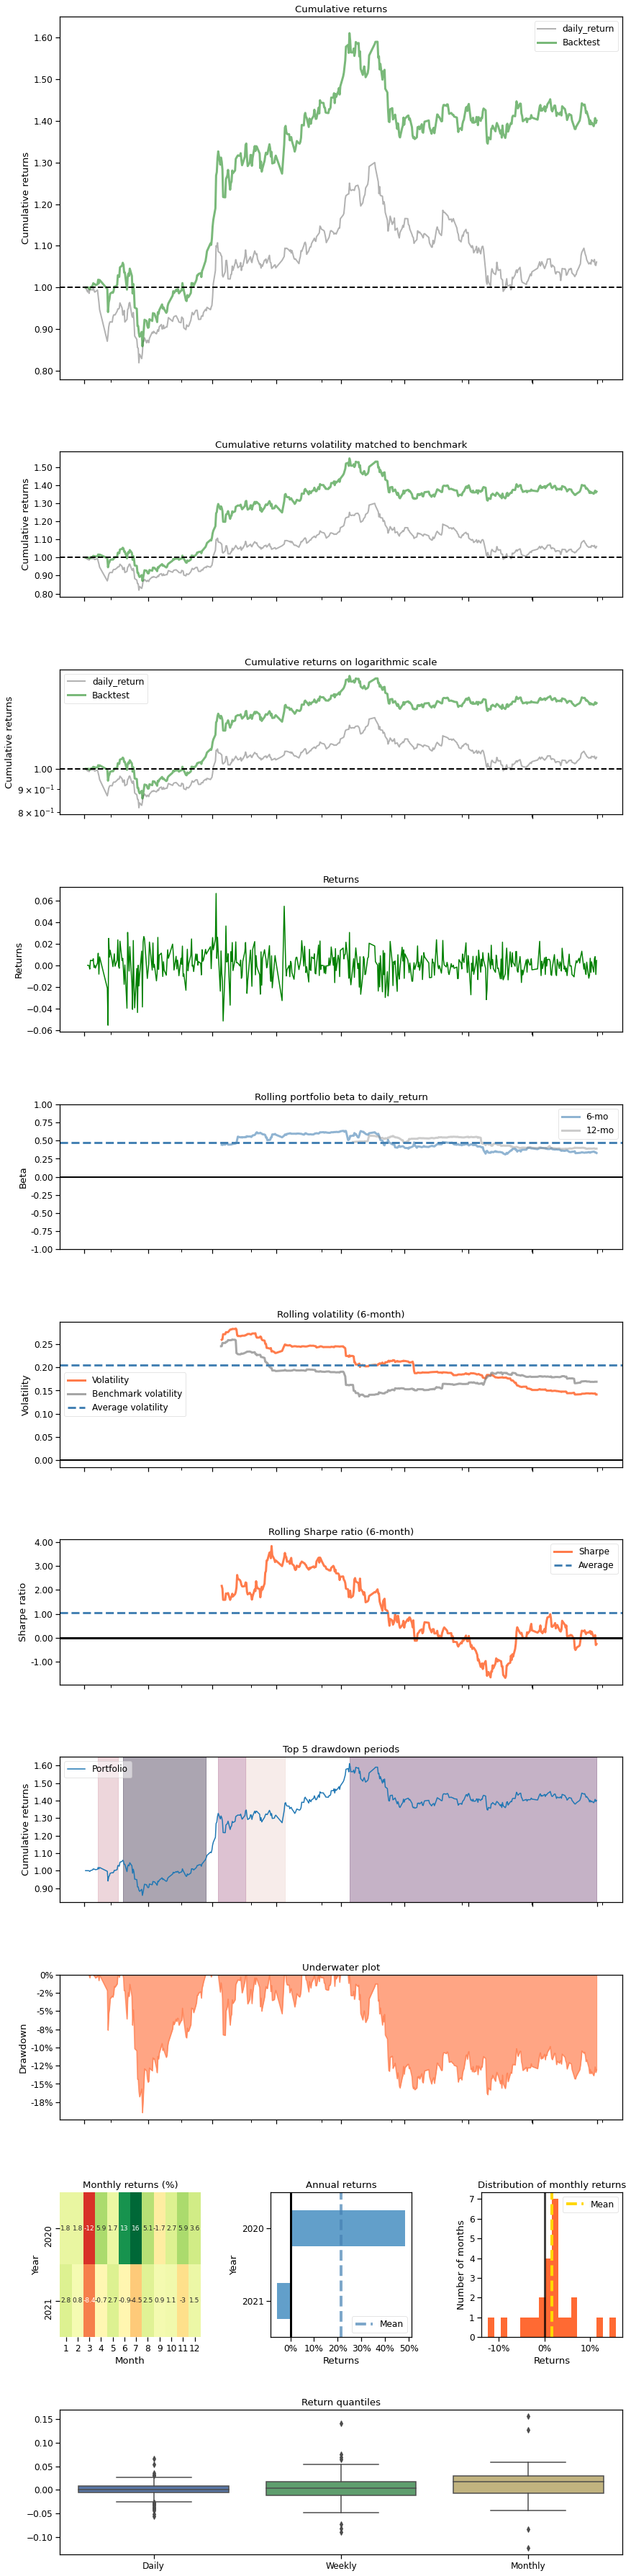

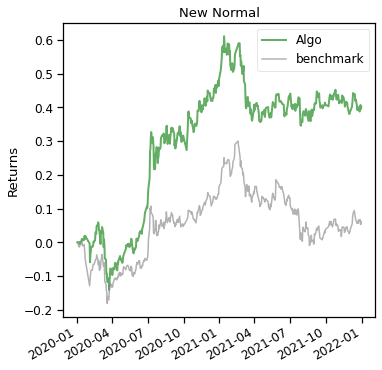

In [45]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(a2c_account_value,
        baseline_start="20200101",
        baseline_end="20220101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 DDPG 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)


c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\li

c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


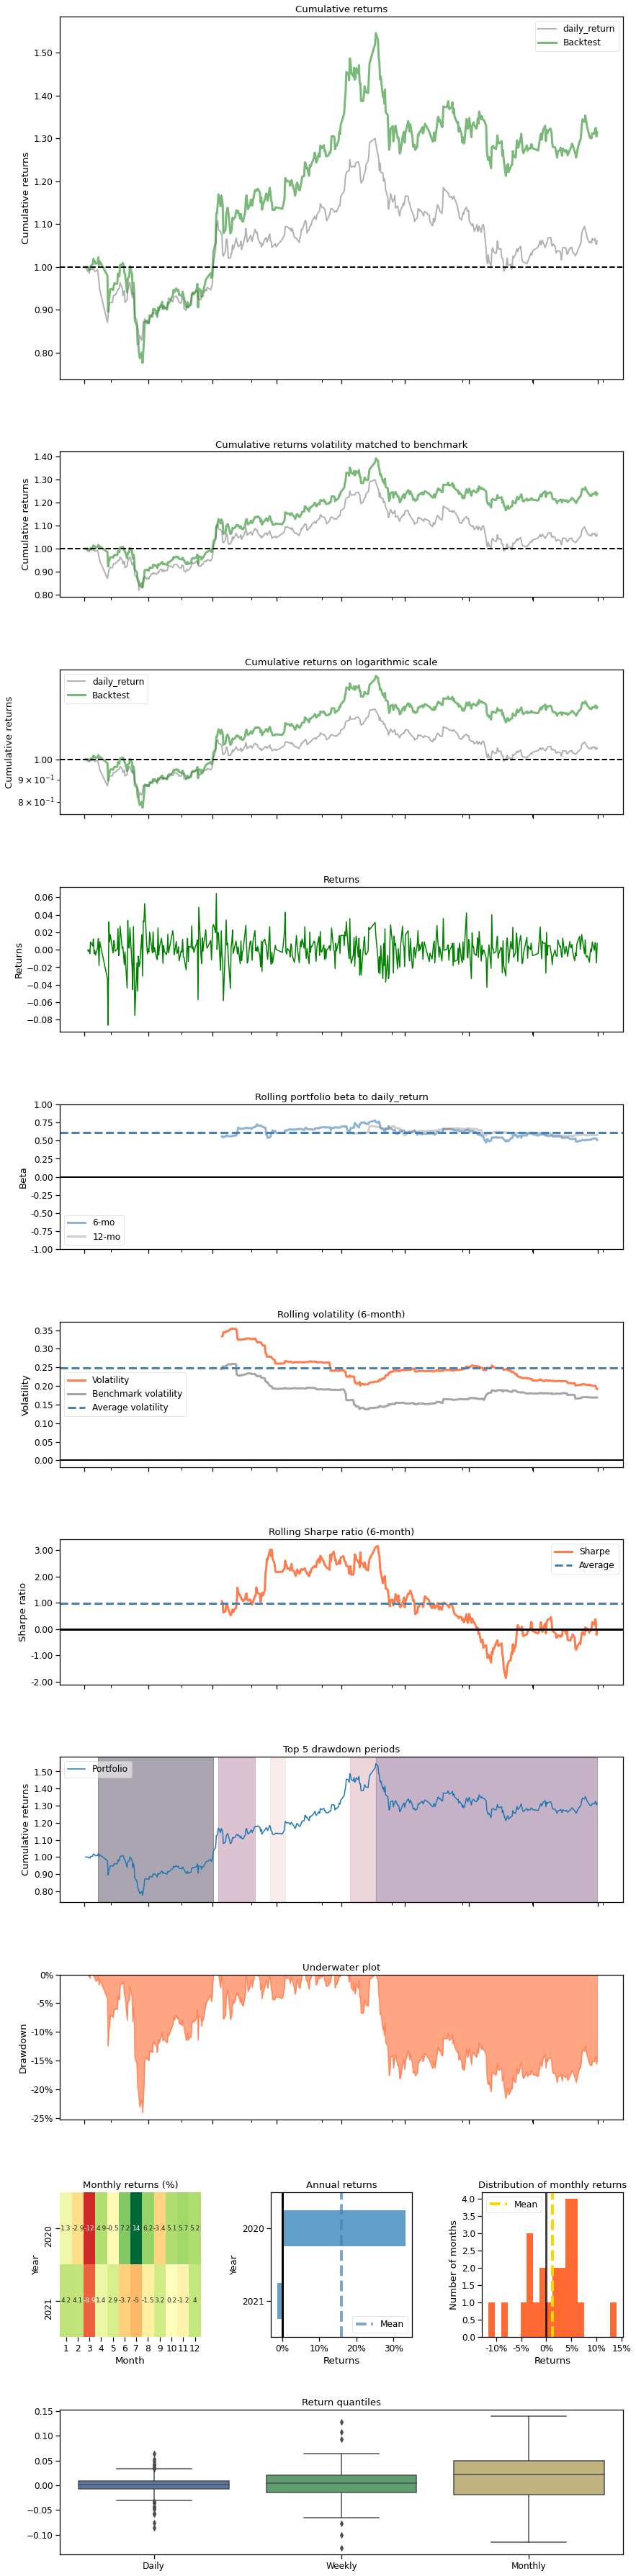

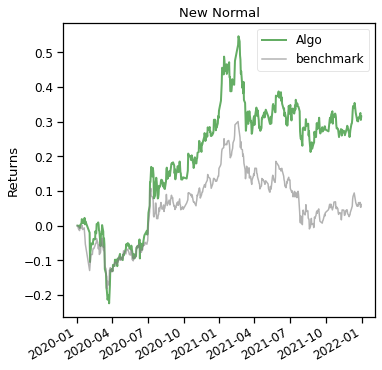

In [13]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(ddpg_account_value,
        baseline_start="20200101",
        baseline_end="20220101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 PPO 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)


c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\li

c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


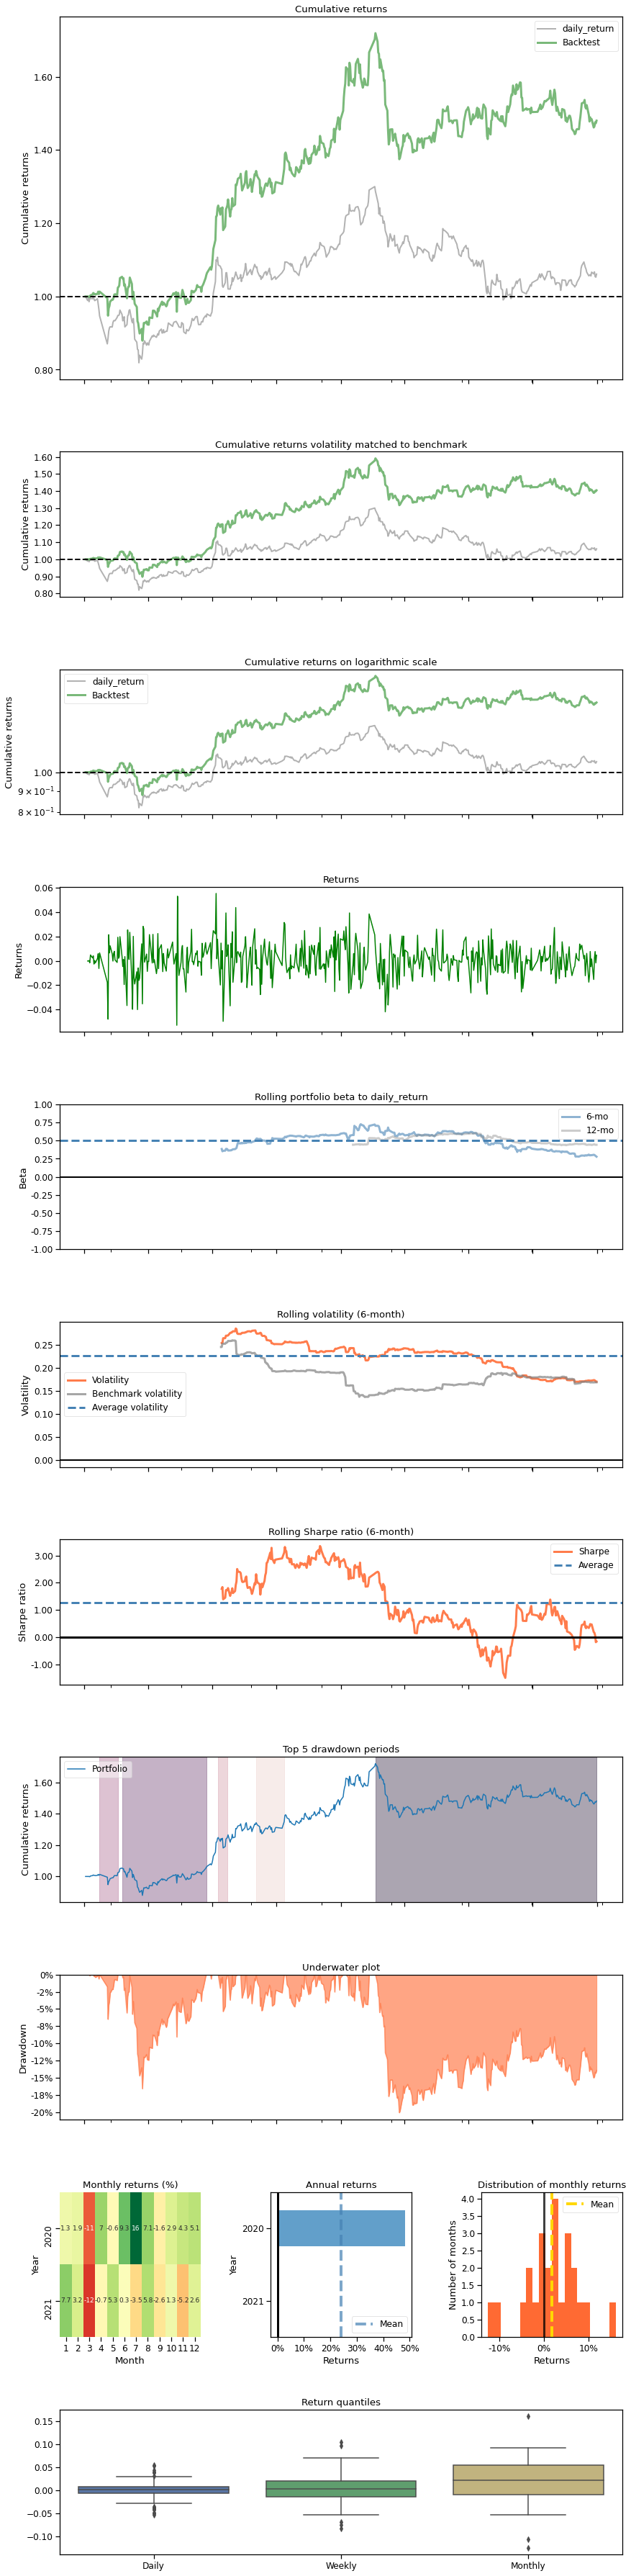

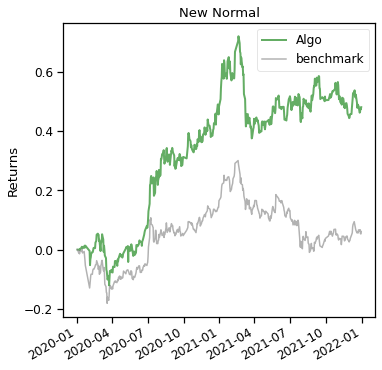

In [14]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(ppo_account_value,
        baseline_start="20200101",
        baseline_end="20220101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 SAC 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)


c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\li

c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


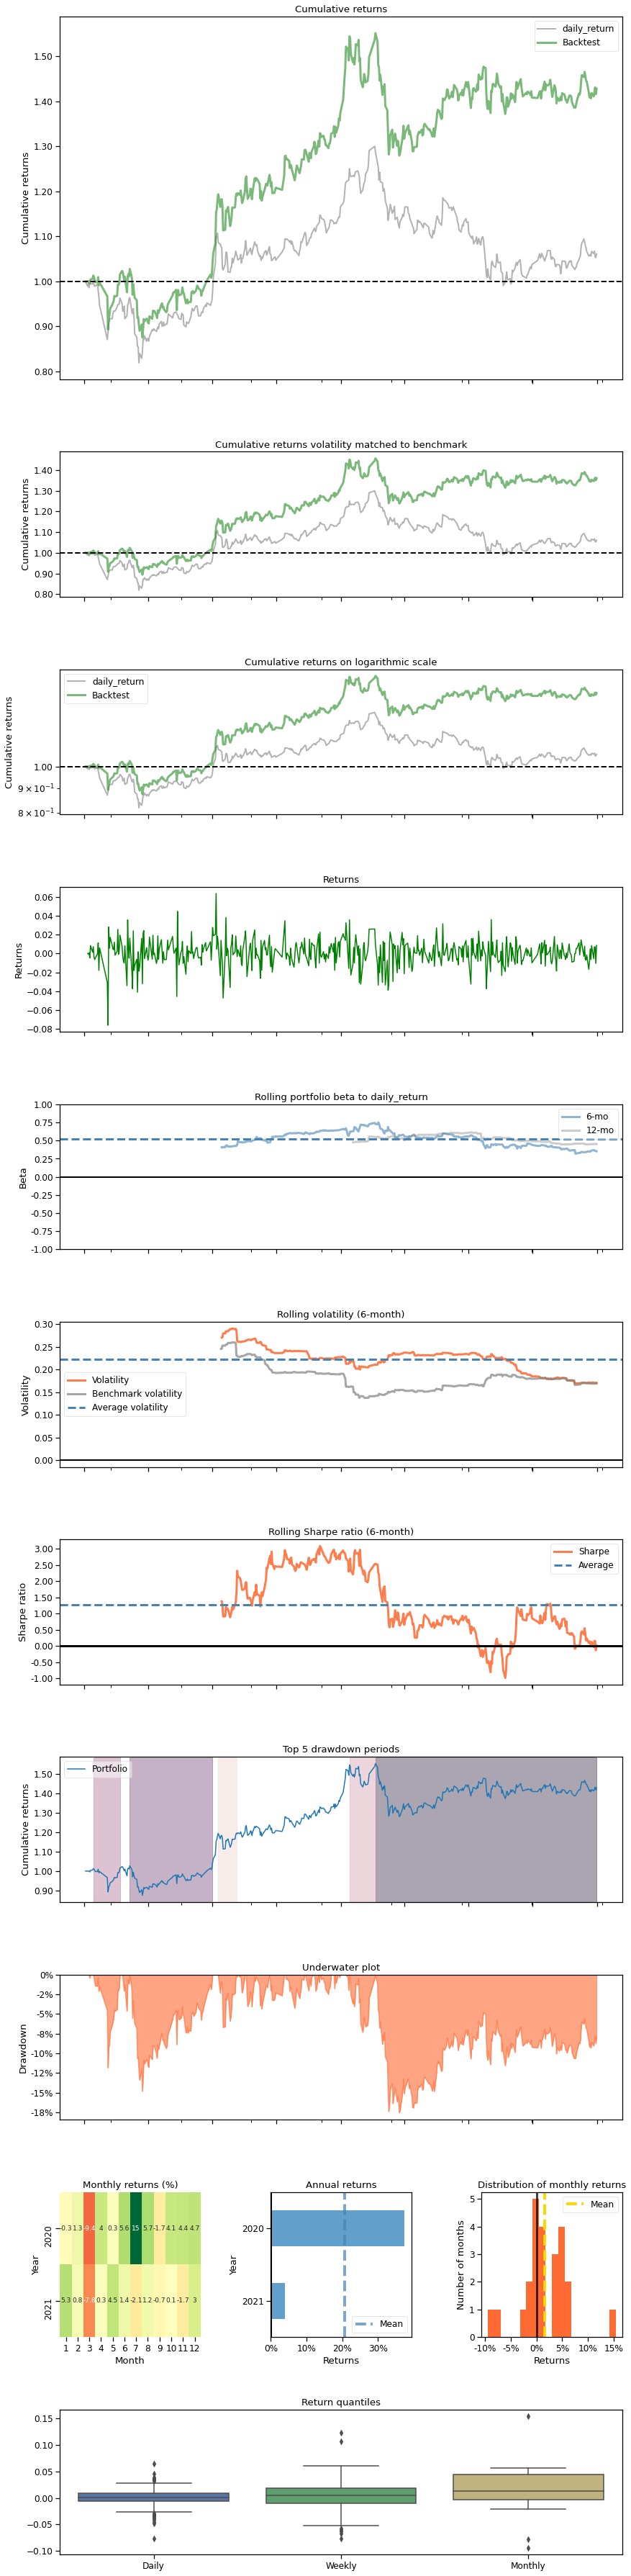

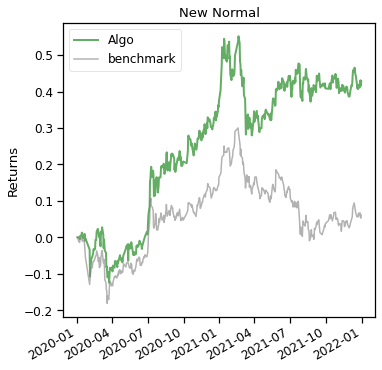

In [15]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(sac_account_value,
        baseline_start="20200101",
        baseline_end="20220101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## 展示 TD3 的回测结果

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)


c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
c:\users\w\appdata\local\programs\python\python39\li

c:\users\w\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexes\base.py:5277: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version.  Use a timezone-aware object instead.
  start_slice, end_slice = self.slice_locs(start, end, step=step, kind=kind)


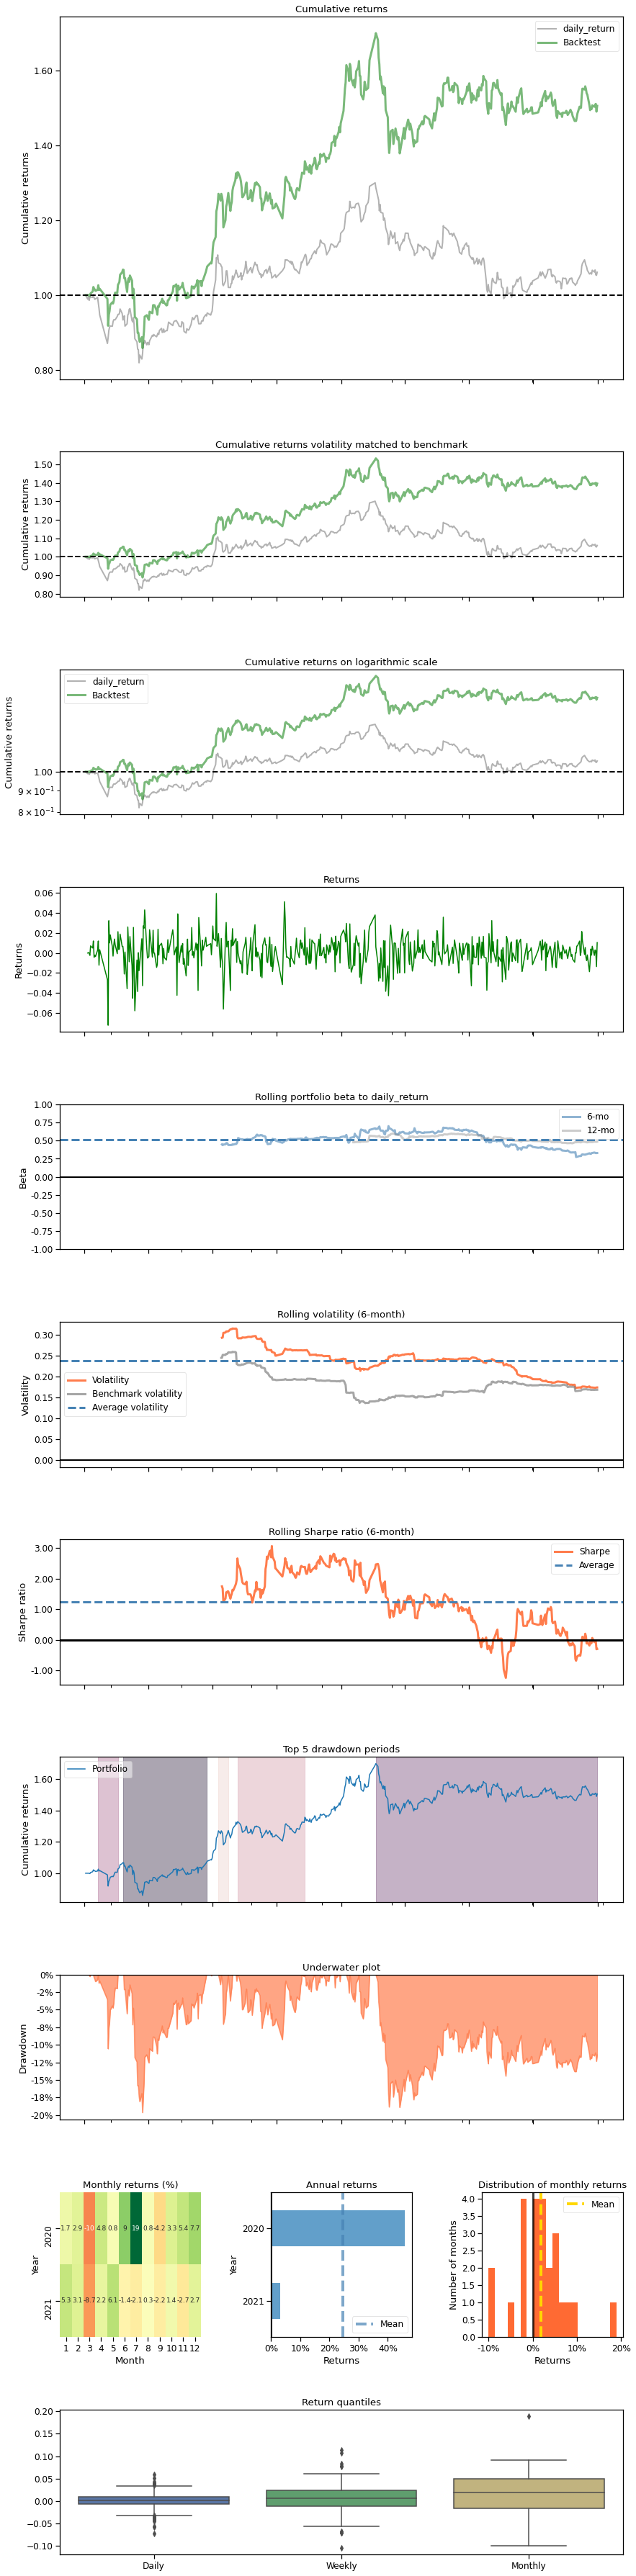

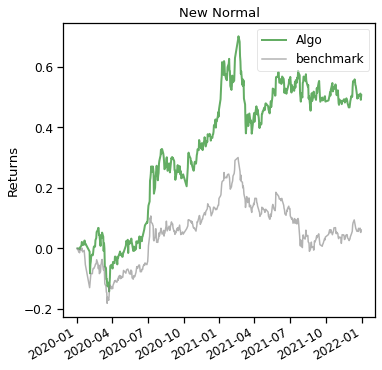

In [16]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(td3_account_value,
        baseline_start="20200101",
        baseline_end="20220101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

# 展示传统策略回测结果 -equal_weight

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)


D:\work\毕业设计\毕业设计\工作代码\StockRL-main-luochuan\StockRL-main-2\utils\pull_data.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(data_tmp)
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Spec

C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:1227: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


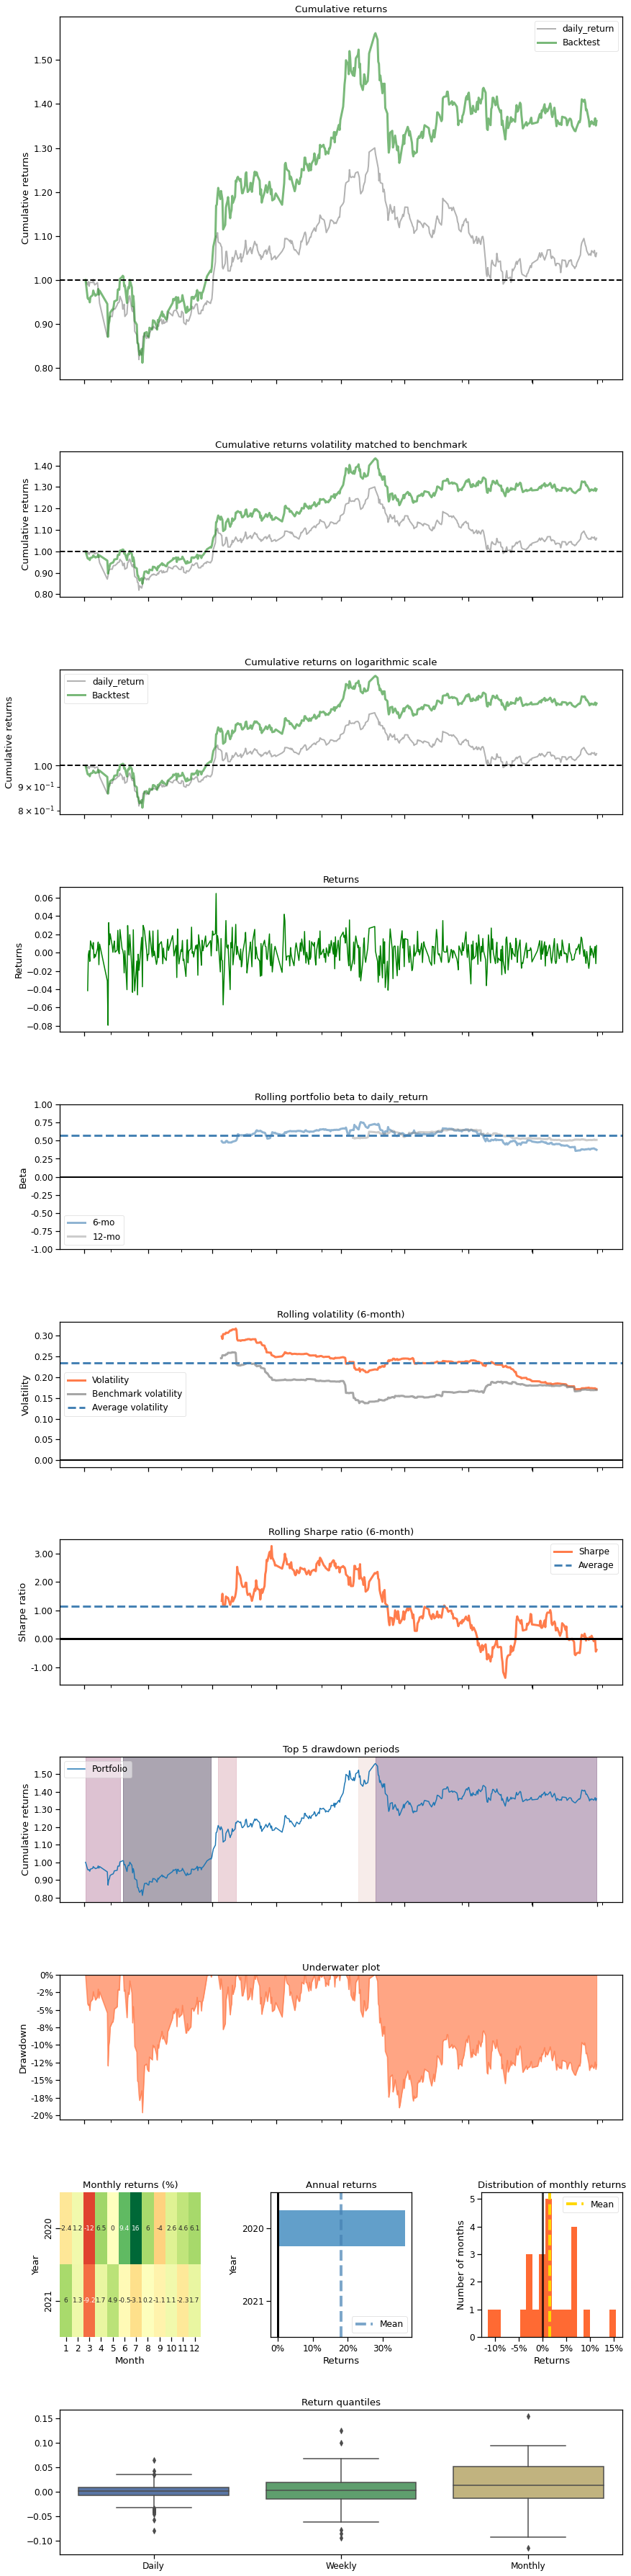

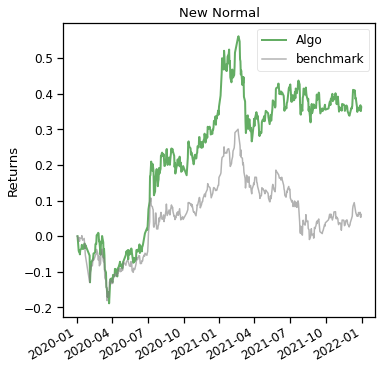

In [16]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(equal_weight,
        baseline_start="20200101",
        baseline_end="20220101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## max_sharpe

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)


D:\work\毕业设计\毕业设计\工作代码\StockRL-main-luochuan\StockRL-main-2\utils\pull_data.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(data_tmp)
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Spec

C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:1227: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


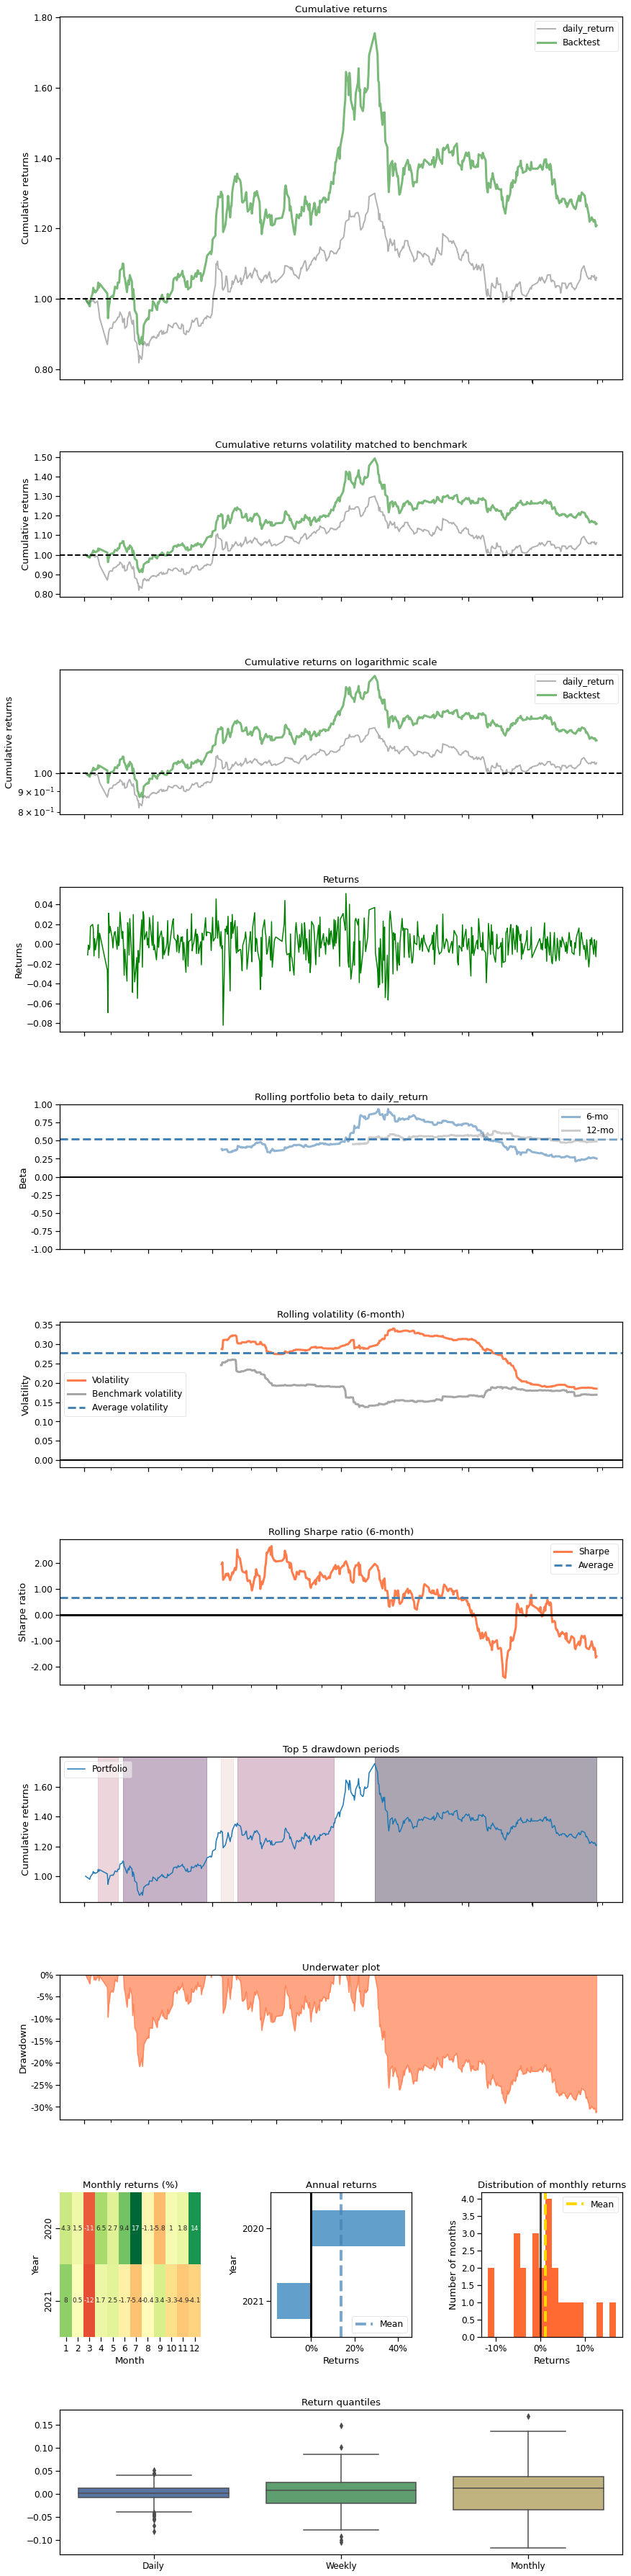

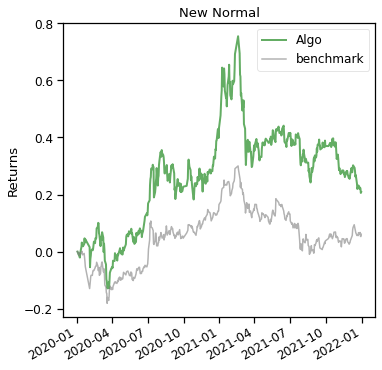

In [17]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(max_sharpe,
        baseline_start="20200101",
        baseline_end="20220101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )

## min-variance

和 000016.SH 指数进行比较
   --- 开始下载 ----
   --- 下载完成 ----
DataFrame 的大小:  (486, 8)


D:\work\毕业设计\毕业设计\工作代码\StockRL-main-luochuan\StockRL-main-2\utils\pull_data.py:60: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_df = data_df.append(data_tmp)
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:541: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Spec

C:\Users\w\Desktop\StockRL-main\lib\site-packages\pyfolio\timeseries.py:1227: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  period = returns_dupe.loc[start:end]


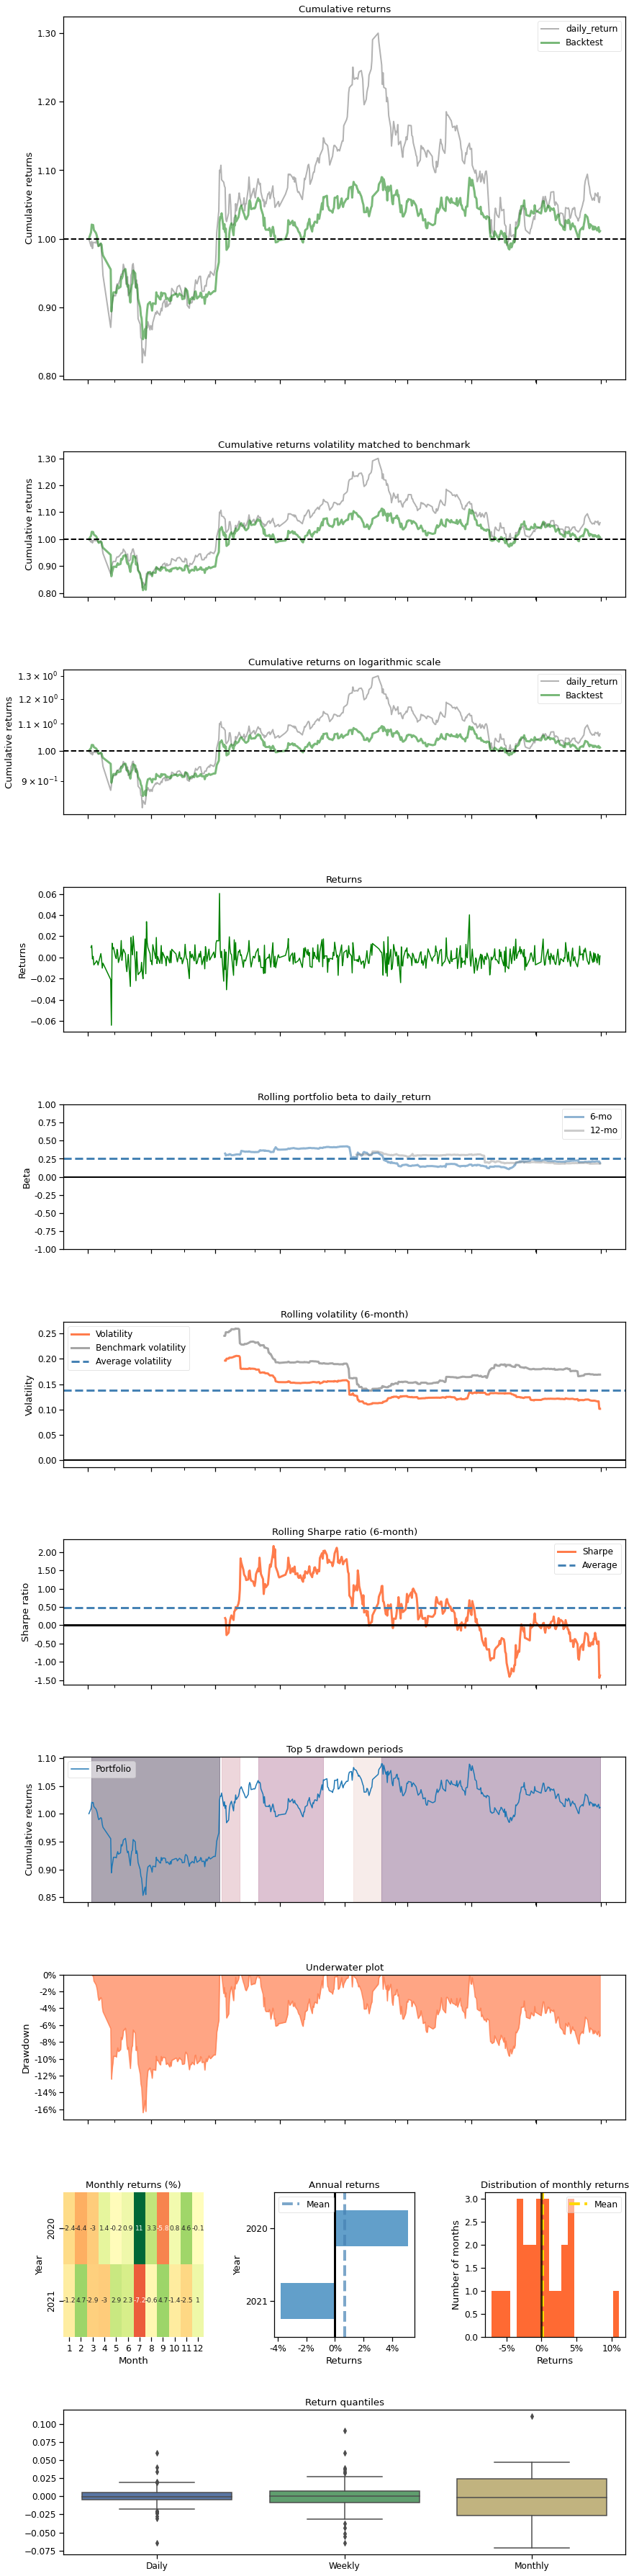

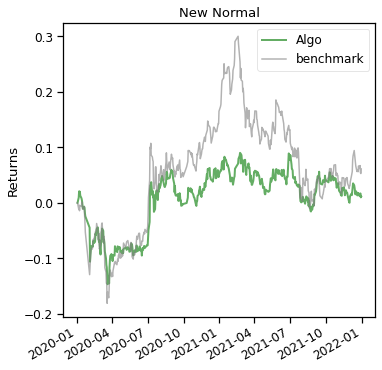

In [18]:
print("和 {} 指数进行比较".format(config.SSE_50_INDEX[0]))
backtest_plot(min_variance,
        baseline_start="20200101",
        baseline_end="20220101",
        baseline_ticker=config.SSE_50_INDEX,
        value_col_name = 'total_assets'
      )